In [ ]:
pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/nvidia.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index for easier time-series analysis
data.set_index('Date', inplace=True)

# Display the first few rows and general info
print(data.head())
print(data.info())
print(data.describe())


              Open    High     Low   Close     Volume  Adj Close
Date                                                            
2023-01-03  14.851  14.996  14.096  14.315  401277000  14.305581
2023-01-04  14.567  14.853  14.241  14.749  431324000  14.739295
2023-01-05  14.491  14.564  14.148  14.265  389168000  14.255614
2023-01-06  14.474  15.010  14.034  14.859  405044000  14.849225
2023-01-09  15.284  16.056  15.141  15.628  504231000  15.617719
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 448 entries, 2023-01-03 to 2024-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       448 non-null    float64
 1   High       448 non-null    float64
 2   Low        448 non-null    float64
 3   Close      448 non-null    float64
 4   Volume     448 non-null    int64  
 5   Adj Close  448 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 24.5 KB
None
             Open        High         Low     

<Figure size 1400x800 with 0 Axes>

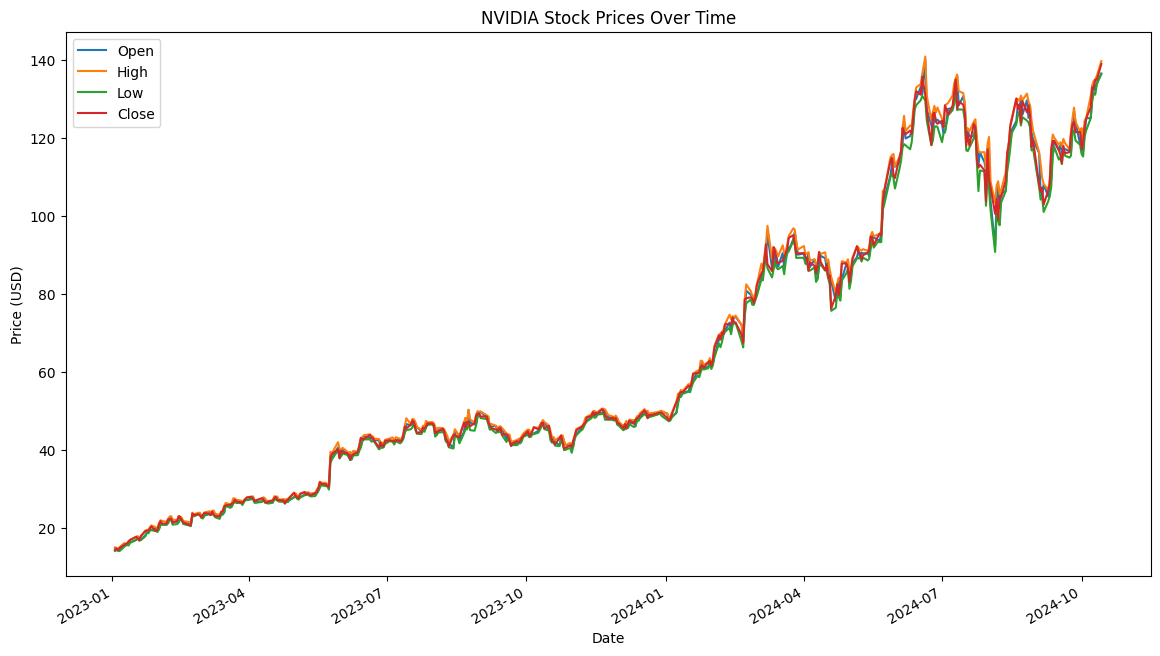

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
data[['Open', 'High', 'Low', 'Close']].plot(figsize=(14, 8), linewidth=1.5)
plt.title("NVIDIA Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(loc='upper left')
plt.show()


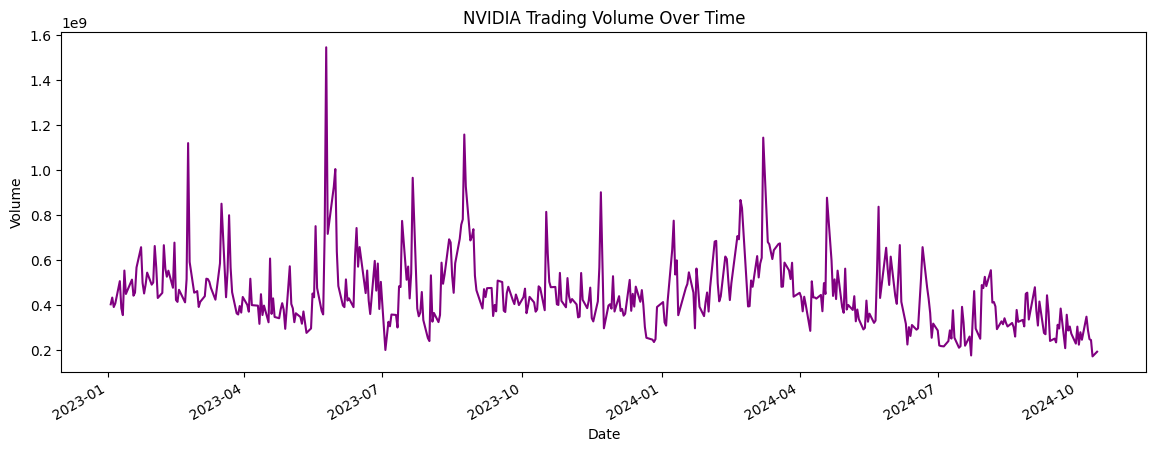

In [ ]:
plt.figure(figsize=(14, 5))
data['Volume'].plot(color='purple', linewidth=1.5)
plt.title("NVIDIA Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

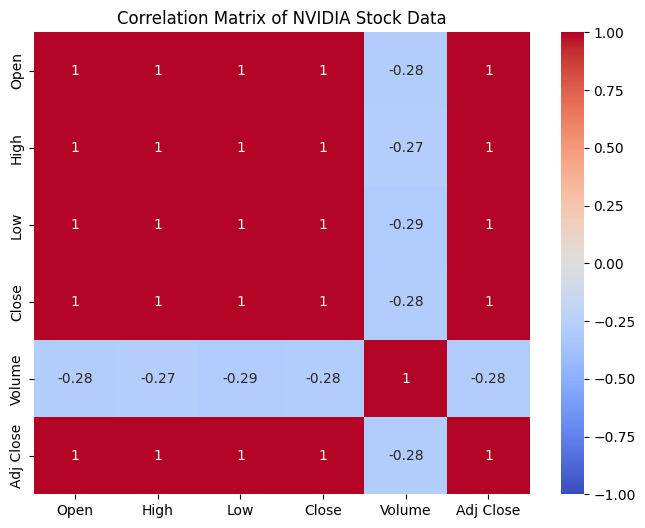

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of NVIDIA Stock Data")
plt.show()

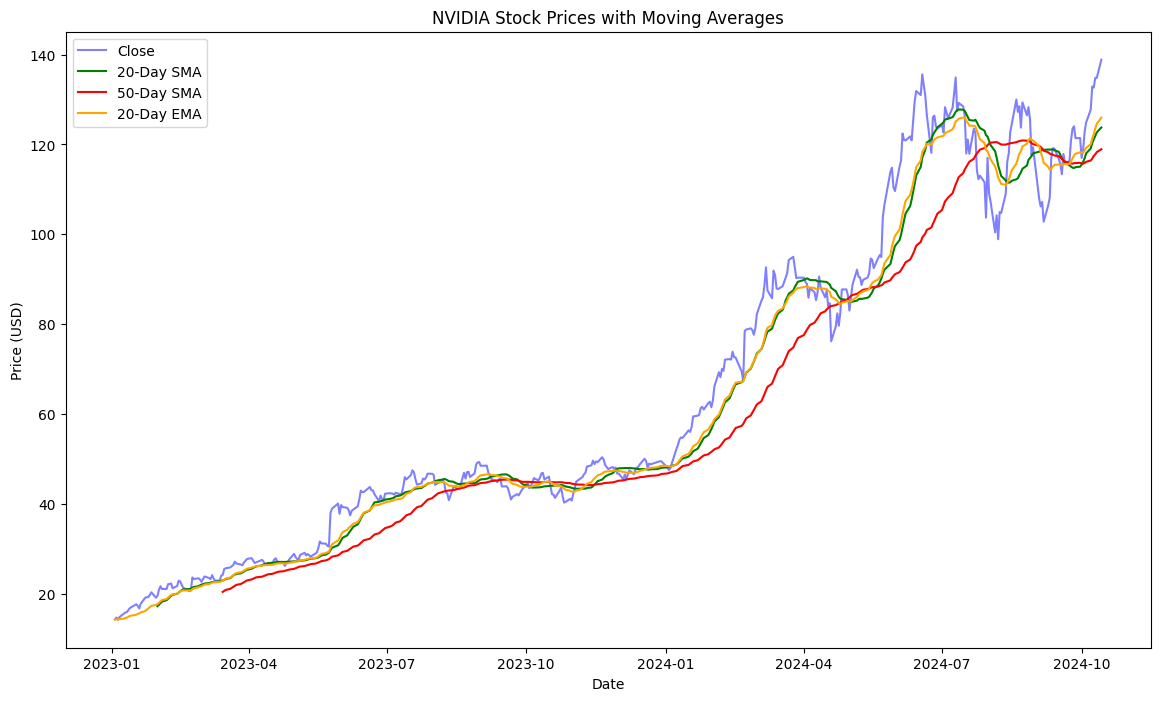

In [ ]:
# Calculate 20-day and 50-day SMAs
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Calculate 20-day EMA
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# Plot Close, SMA, and EMA
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(data['SMA_50'], label='50-Day SMA', color='red')
plt.plot(data['EMA_20'], label='20-Day EMA', color='orange')
plt.title("NVIDIA Stock Prices with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


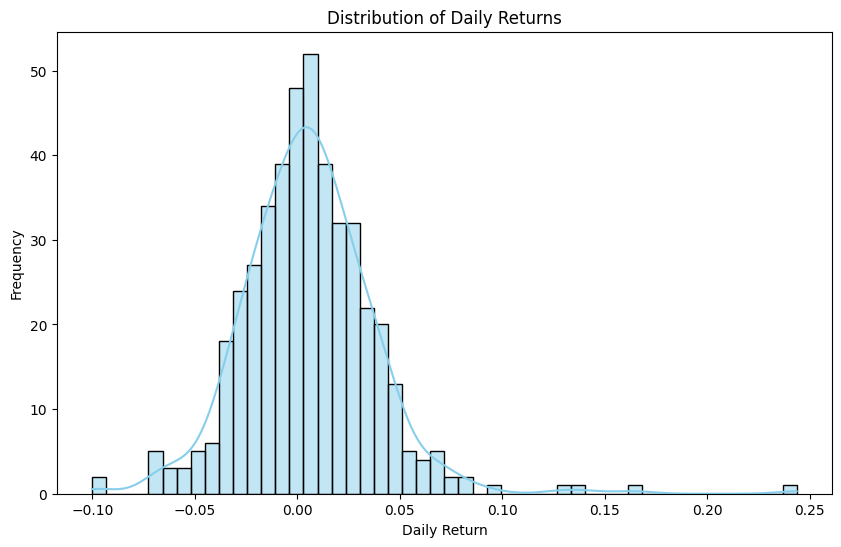

In [ ]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Plot daily returns distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True, color='skyblue')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


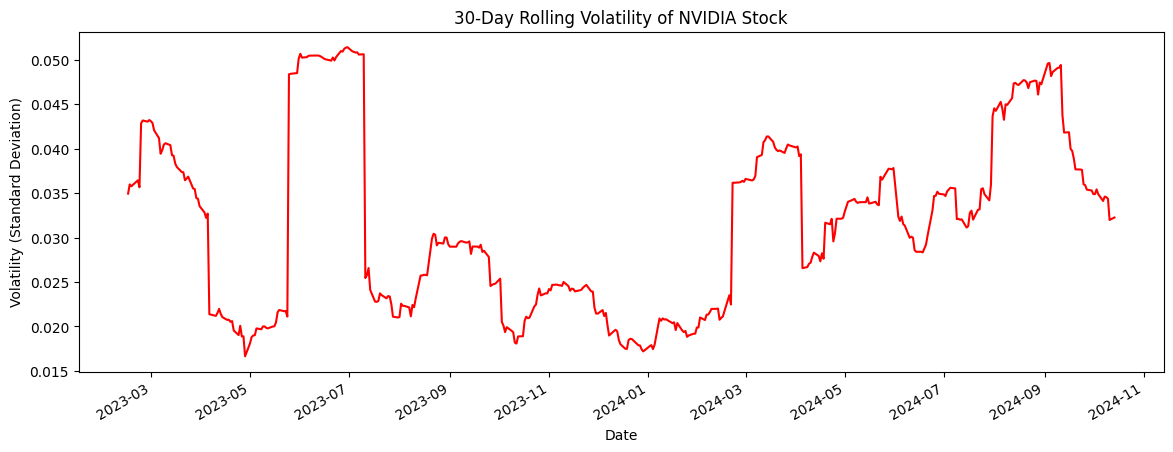

In [ ]:
# Calculate rolling volatility (30-day standard deviation of daily returns)
data['Volatility'] = data['Daily Return'].rolling(window=30).std()

# Plot volatility over time
plt.figure(figsize=(14, 5))
data['Volatility'].plot(color='red', linewidth=1.5)
plt.title("30-Day Rolling Volatility of NVIDIA Stock")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.show()


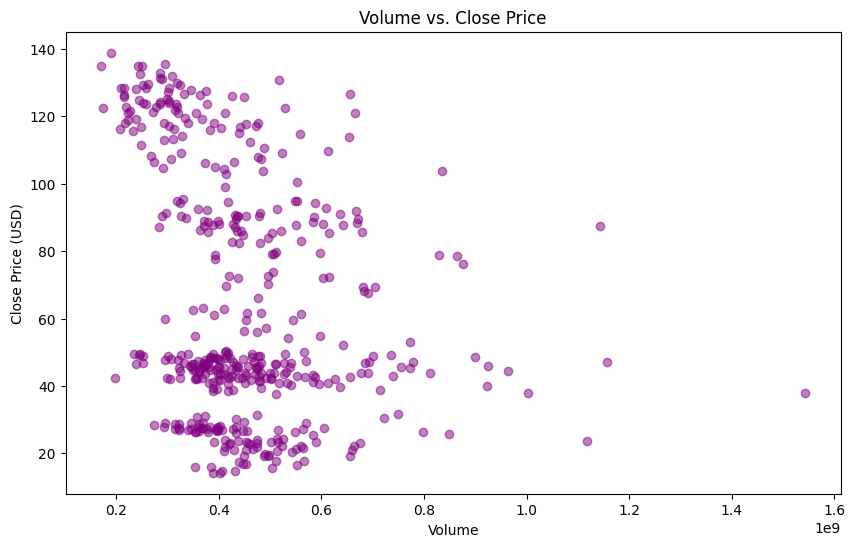

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5, color='purple')
plt.title("Volume vs. Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price (USD)")
plt.show()


In [ ]:
pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.4 MB/s eta 0:00:00


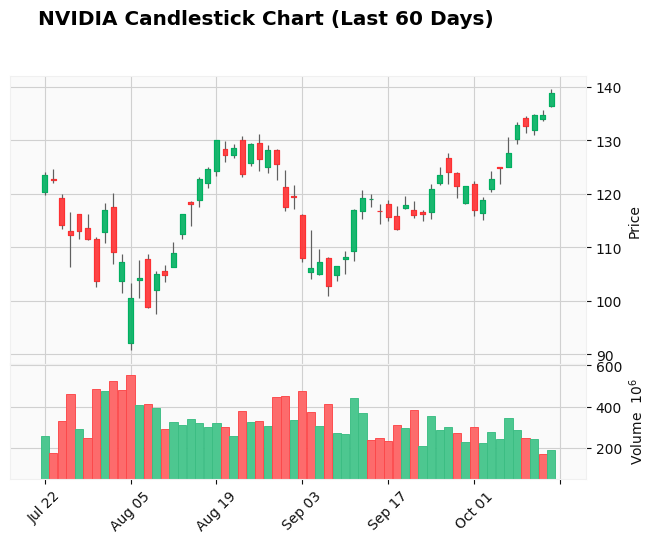

In [ ]:
import mplfinance as mpf

# Plot candlestick chart for recent data
mpf.plot(data[-60:], type='candle', style='yahoo', volume=True, title="NVIDIA Candlestick Chart (Last 60 Days)")


In [ ]:
# Split the data chronologically for training and testing
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Split the data chronologically for training and testing
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Create lagged features for prediction (e.g., previous day's close price)
# NOTE: This is applied to the train_data and test_data DataFrames directly.
train_data['Close_Lag1'] = train_data['Close'].shift(1)
test_data['Close_Lag1'] = test_data['Close'].shift(1)

# Drop NaN values introduced by shifting in both train and test data
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Update train and test data with the lagged features
X_train = train_data[['Close_Lag1']]
y_train = train_data['Close']
X_test = test_data[['Close_Lag1']]
y_test = test_data['Close']

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
predictions = lr_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Linear Regression MSE: {mse}")

Linear Regression MSE: 20.85341182618047


<ipython-input-14-4b9ba62cfc4f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Close_Lag1'] = train_data['Close'].shift(1)
<ipython-input-14-4b9ba62cfc4f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Close_Lag1'] = test_data['Close'].shift(1)
<ipython-input-14-4b9ba62cfc4f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

# Prepare data for LSTM
X_train_lstm = []
y_train_lstm = []

for i in range(60, len(train_data)):
    X_train_lstm.append(scaled_data[i-60:i, 0])  # Last 60 days
    y_train_lstm.append(scaled_data[i, 0])

X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32)

# Prepare test data and make predictions
X_test_lstm = []
y_test_lstm = scaled_data[train_size:, 0]

for i in range(60, len(test_data) + 60):
    X_test_lstm.append(scaled_data[i-60:i, 0])

X_test_lstm = np.array(X_test_lstm)
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# Predict and inverse scale
predictions_lstm = model.predict(X_test_lstm)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Evaluate LSTM model
lstm_mse = mean_squared_error(test_data['Close'], predictions_lstm)
print(f"LSTM Model MSE: {lstm_mse}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0864
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0104
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0067
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0050
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0047
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0039
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0030
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0033
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0028
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0026
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
LSTM Model MSE: 5789.61343852924


In [ ]:
import pandas as pd

# Assuming data is loaded into a DataFrame called `data`
# Calculate the target variable: 1 if the next day's Close price is higher, 0 otherwise
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)  # Drop any rows with NaN values created by shifting


In [ ]:
# Adding lagged Close prices
data['Close_Lag1'] = data['Close'].shift(1)
data['Close_Lag2'] = data['Close'].shift(2)

# Adding moving averages as features
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()

# Drop rows with NaN values after feature creation
data.dropna(inplace=True)


In [ ]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Define features and target
features = ['Close_Lag1', 'Close_Lag2', 'MA5', 'MA10', 'MA20']
X_train = train_data[features]
y_train = train_data['Target']
X_test = test_data[features]
y_test = test_data['Target']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.5394736842105263
              precision    recall  f1-score   support

           0       0.52      0.47      0.49        36
           1       0.56      0.60      0.58        40

    accuracy                           0.54        76
   macro avg       0.54      0.54      0.54        76
weighted avg       0.54      0.54      0.54        76



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))


Gradient Boosting Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        36
           1       0.53      0.53      0.53        40

    accuracy                           0.50        76
   macro avg       0.50      0.50      0.50        76
weighted avg       0.50      0.50      0.50        76



In [ ]:
import numpy as np
import pandas as pd

# Assuming `data` is your DataFrame

# Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = calculate_rsi(data)

# Moving Average Convergence Divergence (MACD)
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger Bands
data['MA20'] = data['Close'].rolling(window=20).mean()
data['BB_upper'] = data['MA20'] + (2 * data['Close'].rolling(window=20).std())
data['BB_lower'] = data['MA20'] - (2 * data['Close'].rolling(window=20).std())

# Drop rows with NaN values after feature creation
data.dropna(inplace=True)


In [ ]:
# Create the binary target variable
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)

# Define features and target
features = ['RSI', 'MACD', 'Signal_Line', 'MA20', 'BB_upper', 'BB_lower', 'Close']
X = data[features]
y = data['Target']

# Chronological train-test split
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Hyperparameter grid for RandomForest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=tscv, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Get the best model
rf_best = rf_grid.best_estimator_
rf_predictions = rf_best.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Hyperparameter grid for XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=tscv, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Get the best model
xgb_best = xgb_grid.best_estimator_
xgb_predictions = xgb_best.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))


Random Forest Accuracy: 0.4794520547945205
              precision    recall  f1-score   support

           0       0.45      0.59      0.51        34
           1       0.52      0.38      0.44        39

    accuracy                           0.48        73
   macro avg       0.49      0.49      0.48        73
weighted avg       0.49      0.48      0.47        73



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:24:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:24:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:24:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:24:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:24:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Accuracy: 0.5068493150684932
              precision    recall  f1-score   support

           0       0.25      0.03      0.05        34
           1       0.52      0.92      0.67        39

    accuracy                           0.51        73
   macro avg       0.39      0.48      0.36        73
weighted avg       0.40      0.51      0.38        73



In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Hyperparameter grid for RandomForest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=tscv, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Get the best model
rf_best = rf_grid.best_estimator_
rf_predictions = rf_best.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Hyperparameter grid for XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=tscv, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Get the best model
xgb_best = xgb_grid.best_estimator_
xgb_predictions = xgb_best.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))


Random Forest Accuracy: 0.4794520547945205
              precision    recall  f1-score   support

           0       0.45      0.59      0.51        34
           1       0.52      0.38      0.44        39

    accuracy                           0.48        73
   macro avg       0.49      0.49      0.48        73
weighted avg       0.49      0.48      0.47        73



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:25:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:25:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:25:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:25:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:25:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Accuracy: 0.5068493150684932
              precision    recall  f1-score   support

           0       0.25      0.03      0.05        34
           1       0.52      0.92      0.67        39

    accuracy                           0.51        73
   macro avg       0.39      0.48      0.36        73
weighted avg       0.40      0.51      0.38        73



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:25:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble with Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('xgb', xgb_best)
], voting='soft')

ensemble_model.fit(X_train, y_train)
ensemble_predictions = ensemble_model.predict(X_test)

print("Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_predictions))
print(classification_report(y_test, ensemble_predictions))


Ensemble Model Accuracy: 0.5205479452054794
              precision    recall  f1-score   support

           0       0.48      0.47      0.48        34
           1       0.55      0.56      0.56        39

    accuracy                           0.52        73
   macro avg       0.52      0.52      0.52        73
weighted avg       0.52      0.52      0.52        73



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:26:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
